# **$K$-Means Clustering**

**Objectives:**
- [A] Importing $K$-Means from scikit-learn
- [B] The $K$ cluster means
- [C] The cluster assignments
- [D] Sum of Squared Errors (SSE)
- [E] Selecting $K$: The number of clusters

---


We import the same packages as before:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )


Loading data:

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

# Load X
X = iris.data
variable_labels = iris.feature_names
X = pd.DataFrame(X, columns=variable_labels)

X = X - X.mean()
X = X / X.std()

# Load y
y = iris.target

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---
# [A] Importing $K$-Means from scikit-learn

The $K$-means functionality can be found in the **`cluster`** subpackage of **scikit-learn**:

In [ ]:
from sklearn.cluster import KMeans # Notice the capitalization!

As mentioned before, one of the advantages of working with **scikit-learn** is that the structure of working with different methods is made as similar as possible.

That means that the general workflow for **`KMeans`** is similar to that of the previous methods we have discussed. This allows you to quickly pick up new methods.

Again, the general workflow is as follows:
> 1. Initialize a new object: a **`KMeans`** object in this case
> 2. Call the **`fit`** method on that object using data to estimate the unknowns in the model
> 3. Extract and interpret the results

Just as for `MDS`, the **initialization** of the **`KMeans`** object is very important for the behavior and output of the algorithm.

There are four parameters of **`KMeans`** that you should be familiar with when initializing a new object:
- **`n_clusters`** (Note: Not **`n_components`** in contrast to before!!!)
 - Specifies the value for $K$, i.e. the number of clusters
 - Default value is 8 (Note: Not 2 (as in MDS) or $P$ (as in PCA))
- **`random_state`**
 - **Always** set this value to a non-negative integer for reproducible results
- **`n_init`**
 - The number of **random starts** used by the $K$-means algorithm
 - Default value: 10
- **`max_iter`**
 - The maximum number of iterations **per random start**
 - Default: 300

For more details about these parameters, refer to the lecture materials for $K$-Means (and MDS).

---
# [B] The $K$ cluster means

First, let's create a $K$-means object and fit a $K$-means solution:

In [ ]:
kmeans = KMeans(random_state=744)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=744, tol=0.0001, verbose=0)

The cluster means (centroids) are stored in the **`cluster_centers_`** attribute.

To be consistent with the notation introduced in the lecture slides, we will store the cluster means in in a variable **`M`**:

In [ ]:
M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1, columns=variable_labels)
M.round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,0.22,-0.52,0.52,0.47
2,-0.57,1.95,-1.27,-1.20
3,0.85,0.17,0.86,1.04
4,-0.36,-1.41,0.11,0.00
5,-1.42,-0.07,-1.33,-1.32
6,1.83,-0.41,1.39,1.01
7,2.12,1.55,1.50,1.36
8,-0.97,0.87,-1.30,-1.23


Some information about **`M`**:
- **`M`** is a $K \times P$ matrix
- The $k$-th row corresponds to $\mathbf{m}_k$ the $k$-th cluster mean, a $P$-dimensional vector
- Each column corresponds to a variable in the data matrix $\mathbf{X}$



Like before, we can visualize our results by creating a scatter plot. The code below creates a scatter plot of petal length (cm) vs. petal width (cm):

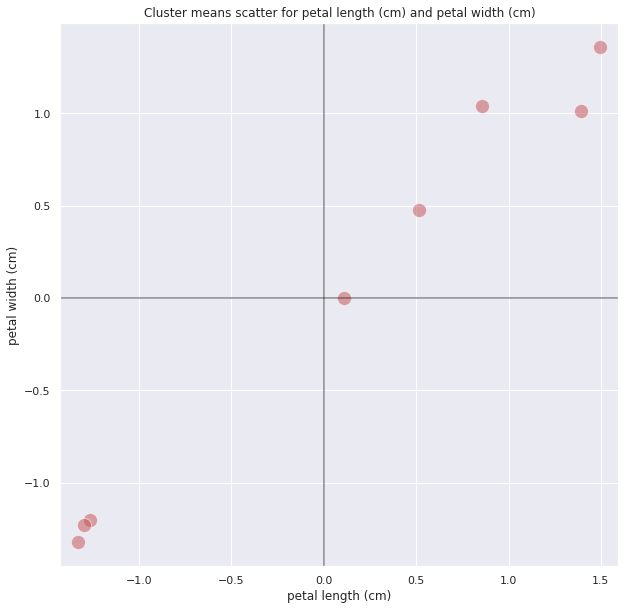

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'petal length (cm)'
y_var = 'petal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


plt.axis('equal')
plt.show()

For further insight it is a good idea to label the cluster means:

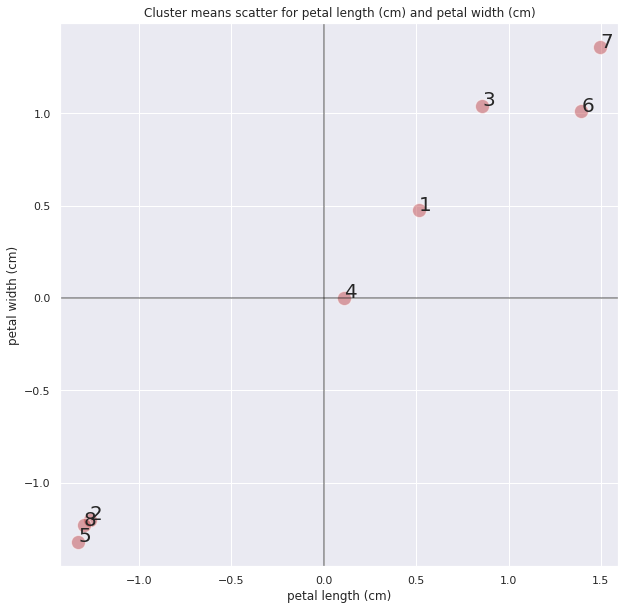

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'petal length (cm)'
y_var = 'petal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

We can further extend the scatter plot by including the data points as well:

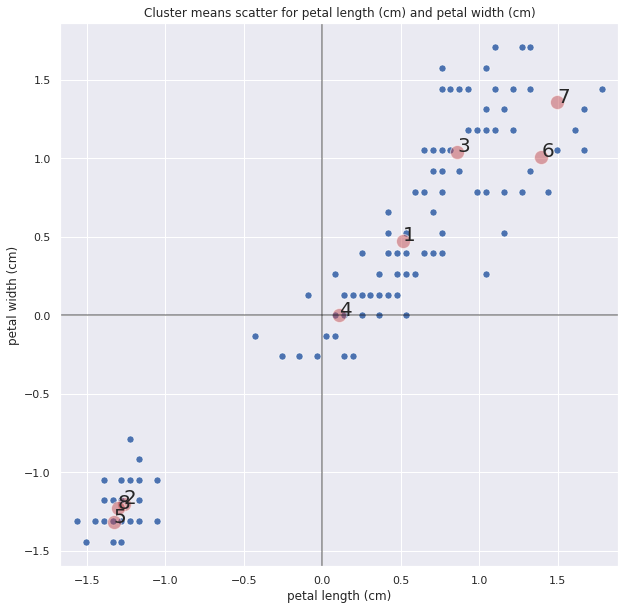

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'petal length (cm)'
y_var = 'petal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

To illustrate this, we can scatter another pair of variables in the data:

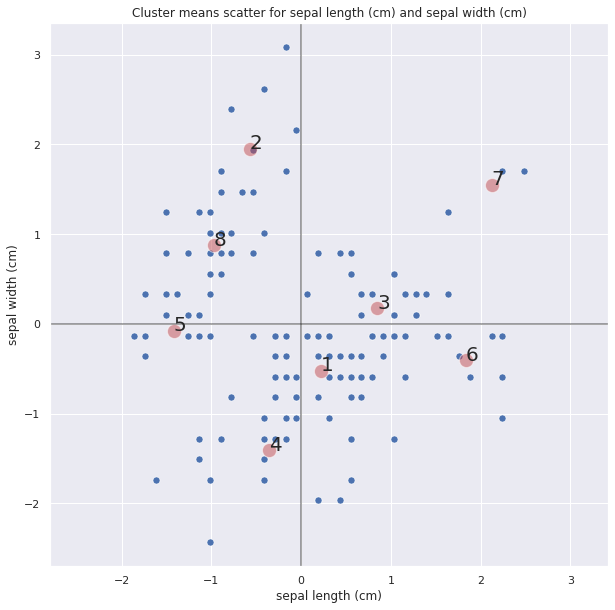

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'sepal length (cm)'
y_var = 'sepal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

**!!! IMPORTANT NOTES !!!**
> - Remember that if you are creating a (2D) scatter plot, you only get a view of your data for the 2 variables you scatter plotted
> - Sometimes, this view can be quite misleading, as we have seen in the example above for clusters 5, 8, and 2
> - As a good marketing analyst, you should be aware of this! This is also why dimensionality reduction using PCA for example is such a powerful tool! Consider combining it with $K$-means!

---
# [C] The cluster assignments

The $N$ cluster assignments are stored in the **`labels_`** attribute of the `KMeans` object.

To be consistent with the notation introduced in the lecture slides, we will store the cluster assignments in a variable **`a`**:

In [ ]:
# add 1 to let the labels range from 1, ..., K instead of 0, ..., K - 1
a = kmeans.labels_ + 1
a = pd.Series(a)
a

0      8
1      5
2      5
3      5
4      8
      ..
145    3
146    1
147    3
148    3
149    1
Length: 150, dtype: int32

Some information about **`a`**:
- **`a`** is a vector of length $N$
- The $i$-th element corresponds to the cluster assignment for the $i$-th observation in $\mathbf{X}$, that is, $\mathbf{x}_i$

We can compute the number of assignments assigned to each cluster using the **`value_counts`** method of a pandas Series:

In [ ]:
a.value_counts()

1    36
3    30
8    21
4    21
5    16
2    13
6    10
7     3
dtype: int64

By default, the output of `value_counts` is sorted in descending frequency. We can also sort on the value of the index, by calling the **`sort_index`** method after calling `value_counts`:

In [ ]:
a.value_counts().sort_index()

1    36
2    13
3    30
4    21
5    16
6    10
7     3
8    21
dtype: int64

Note that the cluster sizes can be very different, cluster 7 only has 3 observations assigned to it, while cluster 1 has 36 observations.

For a better interpretation of what the cluster means are, we can use the cluster assignments to manually compute the cluster means that we stored in **`M`**:

In [ ]:
for k in range(kmeans.n_clusters):

    # first, create an indicator that selects the rows for a cluster
    indicator = (a == (k + 1))

    # select the rows, compute their mean, and compare against M
    assert np.allclose(M.loc[k + 1], X.loc[indicator].mean())

print('All good!')

All good!


We can use the information in the cluster assignments **`a`** to enrichen our previous scatter plot, similar to what we have done before:

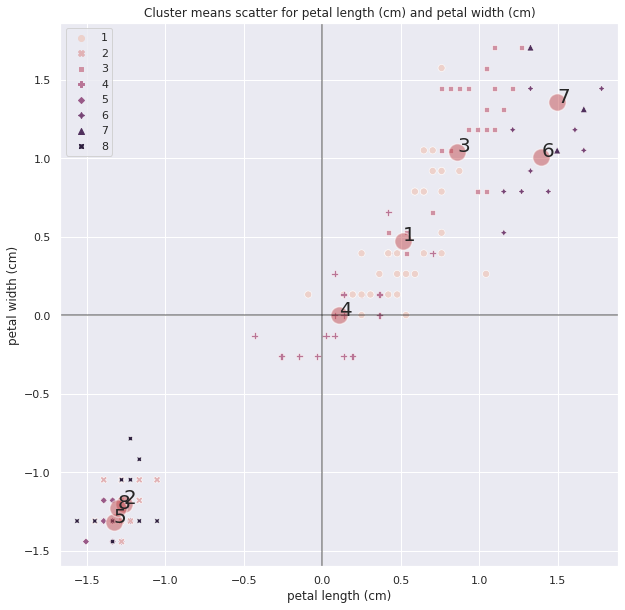

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'petal length (cm)'
y_var = 'petal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

Remember from the lecture slides that the cluster assignment of an observation is based on **Euclidean distance** from that point to each cluster mean (think of this distance as a straight line): An observation is assigned in the cluster that corresponds to the **nearest** cluster mean


---
# [D] Sum of Squared Errors (SSE)

The sum of squared errors (SSE) is stored in the **`inertia_`** attribute of the `KMeans` object:

In [ ]:
SSE = kmeans.inertia_
SSE

62.123668324476014

Some information about **`SSE`**:
- **`SSE`** is always a non-negative float
- The closer **`SSE`** to 0, the better the fit of the data
- The returned **`SSE`** corresponds to the random start of the $K$-means algorithm that obtained the lowest **`SSE`** value

For further insights, we can verify that this is actually the sum of squared errors by computing it manually:

In [ ]:
SSE_own = 0.0
for i in range(X.shape[0]):
    SSE_own += np.sum((X.loc[i] - M.loc[a[i]])**2)

SSE_own

62.12366832447599

Or alternatively, without a for-loop:

In [ ]:
np.sum(np.sum((X - M.loc[a].values)**2, axis=1))

62.123668324476014

---
# [E] Selecting $K$: The number of clusters

As discussed in the lecture slides, there are two ways to select $K$, the number of clusters.
- **"Subjective"**: Look at the interpretability of the $K$-means solution for a given value of $K$
- **"Objective"**: Create an elbow plot of the SSE values for a range of values for $K$

In this course we will focus on the latter.

For the objective criterion, we have to find the $K$-means solution for **a range** of $K$ values
- A **`for`**-loop can be conveniently used for this:

In [ ]:
# Specify the number of different K values we are considering
n_k_values = 20

# Create a dictionary in which we will store the estimated K-means objects
kmeans_objects = {}

# Create a list in which we will store the SSE values for each K-means object
kmeans_sse = []

# Loop over the values 1, 2, ..., n_k_values
for k in range(1, n_k_values + 1):
    
    # do not forget to fix your random state!
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    # save the kmeans object in the dictionary
    kmeans_objects[k] = kmeans

    # save the SSE value of the kmeans object in the list
    kmeans_sse.append(kmeans.inertia_)
    
    print('Done with: k =', k)

Done with: k = 1
Done with: k = 2
Done with: k = 3
Done with: k = 4
Done with: k = 5
Done with: k = 6
Done with: k = 7
Done with: k = 8
Done with: k = 9
Done with: k = 10
Done with: k = 11
Done with: k = 12
Done with: k = 13
Done with: k = 14
Done with: k = 15
Done with: k = 16
Done with: k = 17
Done with: k = 18
Done with: k = 19
Done with: k = 20


Now let's create the "elbow" plot based on the SSE values:

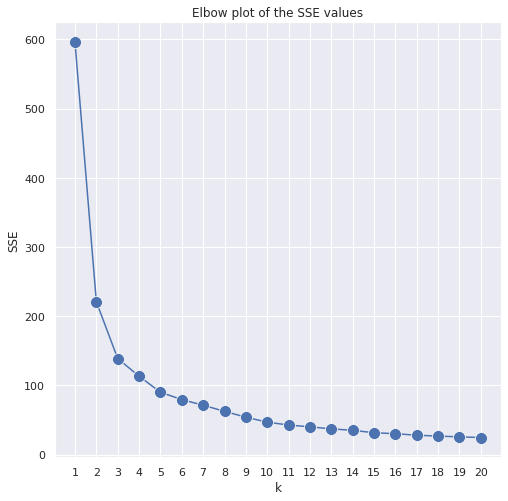

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Elbow plot of the SSE values')
plt.ylabel('SSE')
plt.xlabel('k')

sns.lineplot(
    x=range(1, n_k_values + 1),
    y=kmeans_sse,
    marker='o',
    markersize=12,
)

plt.xticks(range(1, n_k_values + 1))
plt.show()

A few things to take away from this plot:
- **Theoretically**, the SSE values should be a **non-increasing** function of $k$, such that SSE($k+1$) $\leq$ SSE($k$)
- In practice, due to the **local** solutions, this property sometimes does not hold. However, in the example above, it does hold

Therefore we are not interested in the $K$-means solution with the lowest SSE value, as the SSE-value would be 0 if we set $K=N$. But that solution would not lead to any insight!
- The art is to "strike a balance" between finding usable patterns in the data and the complexity of the solution
- This balance occurs at the "bend" of the elbow plot

In practice, the bend in the elbow plot is not super clear
- This is also the case in this example, there are two candidates $K=3$ and $K=5$
- When in doubt, apply **Occam's razor**: Choose the simplest solution! In the context of $K$-means that means choose the solution with fewer clusters

Using the elbow plot and **Occam's razor**, $K=3$ seems to be the best answer here
- Note: You don't have to re-estimate the $K$-means solution, we stored it in the `kmeans_objects` dictionary!


In [ ]:
kmeans = kmeans_objects[3]

M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1, columns=variable_labels)
M.round(2)

a = kmeans.labels_ + 1
a = pd.Series(a)
a

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    3
147    1
148    1
149    3
Length: 150, dtype: int32

Size of the clusters:

In [ ]:
a.value_counts()

3    53
2    50
1    47
dtype: int64

And sorted by index:

In [ ]:
a.value_counts().sort_index()

1    47
2    50
3    53
dtype: int64

Complete scatter plot:

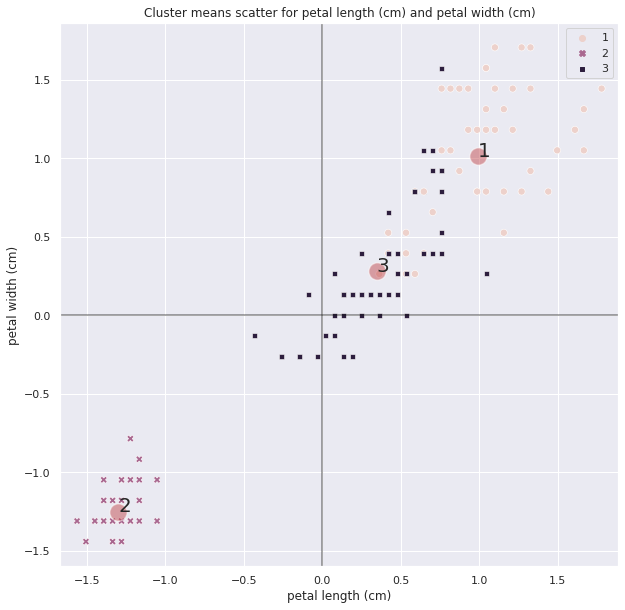

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'petal length (cm)'
y_var = 'petal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

And between another pair of variables:

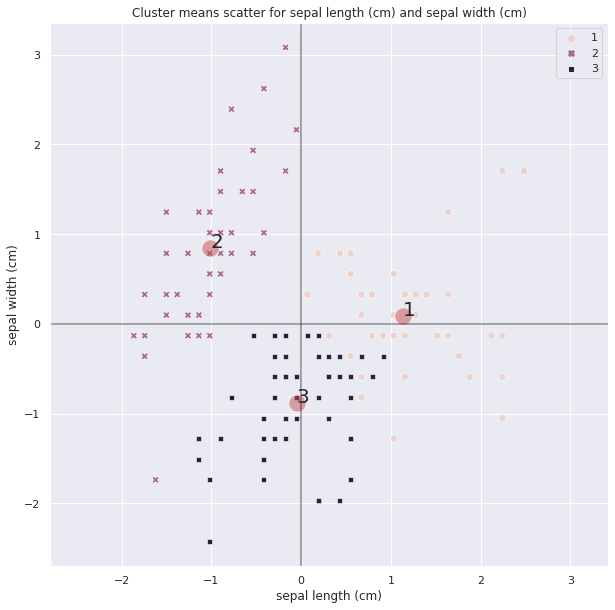

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'sepal length (cm)'
y_var = 'sepal width (cm)'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

There is now a very clear separation between the 3 groups across the 4 variables.

---
# Conclusion

We have discussed 
- How to apply the $K$-Means algorithm to data
- How to visualize its results
- How to determine the number of clusters $K$ using an elbow plot